<a href="https://colab.research.google.com/github/durvaakadam/Handwritten-Equation-Solver/blob/master/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0–1 range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Testing set shape: (10000, 28, 28, 1)


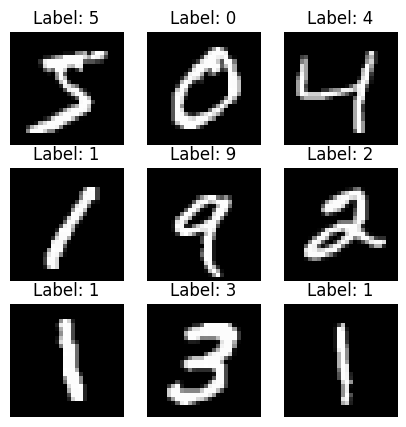

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 digits (0–9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=8,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.8438 - loss: 0.4901 - val_accuracy: 0.9832 - val_loss: 0.0508
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 53ms/step - accuracy: 0.9749 - loss: 0.0837 - val_accuracy: 0.9865 - val_loss: 0.0375
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9823 - loss: 0.0600 - val_accuracy: 0.9888 - val_loss: 0.0320
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9856 - loss: 0.0460 - val_accuracy: 0.9900 - val_loss: 0.0305
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9876 - loss: 0.0404 - val_accuracy: 0.9912 - val_loss: 0.0263
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9915 - val_loss: 0.0290
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 2s - 8ms/step - accuracy: 0.9914 - loss: 0.0247
Test accuracy: 0.9914000034332275


Saving 3new.jpg to 3new (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


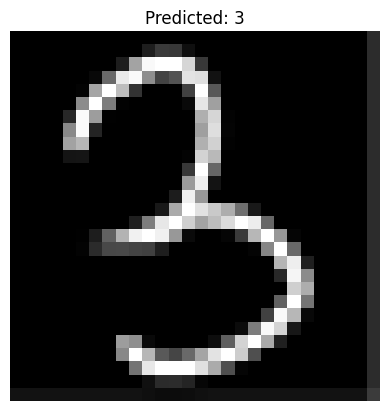

Predicted digit: 3


In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files

# 1. Load the trained model
model = load_model("mnist_cnn.h5")

# 2. Upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

    # 3. Preprocess the image
    img = Image.open(img_path).convert("L")   # grayscale
    img = ImageOps.invert(img)                # invert (MNIST digits are white on black)
    img = img.resize((28, 28))                # resize to 28x28

    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    # 4. Predict
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    # 5. Show result
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {predicted_digit}")
    plt.axis("off")
    plt.show()

    print("Predicted digit:", predicted_digit)


In [ ]:
from google.colab import files
uploaded = files.upload()  # choose your mnist_cnn.h5 again


Saving mnist_cnn (1).h5 to mnist_cnn (1).h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


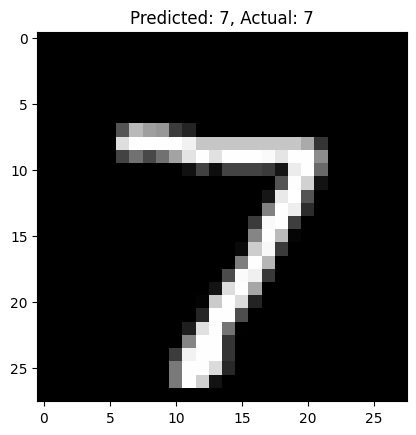

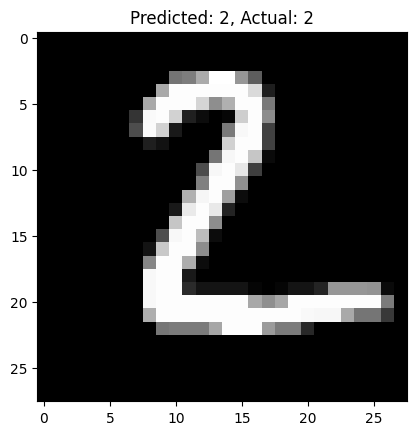

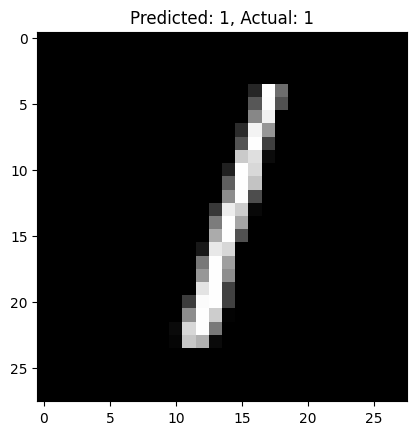

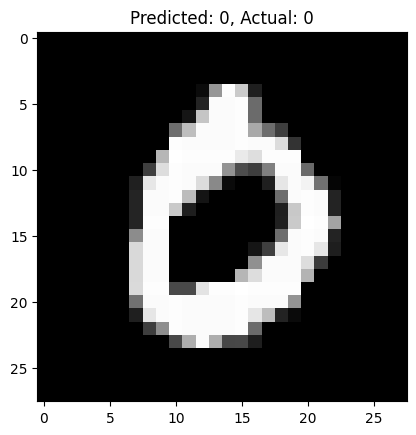

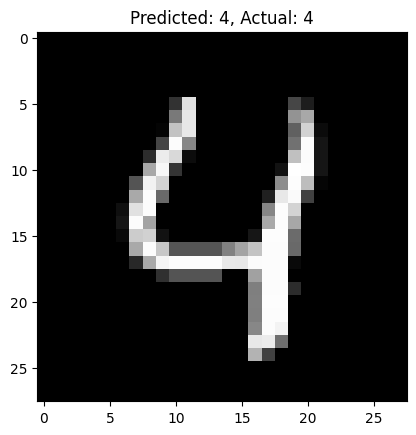

In [ ]:
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.show()


In [ ]:
model.save("mnist_cnn.h5")
from google.colab import files
files.download("mnist_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose your 5.jpg


Saving 5.jpg to 5.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your mnist_cnn.keras or mnist_cnn.h5 file


Saving mnist_cnn.h5 to mnist_cnn.h5


In [ ]:
from tensorflow import keras

# Replace "mnist_cnn.keras" with the exact uploaded filename
model = keras.models.load_model("mnist_cnn.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predicted digit: 2


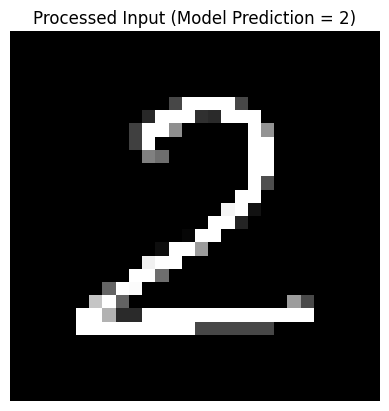

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 1. Load your trained model
model = keras.models.load_model("mnist_cnn.h5")  # change to .h5 if you saved in h5 format

# 2. Load input image (replace with your filename e.g. "5.jpg")
img = cv2.imread("2.jpg")

# 3. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4. Denoise slightly (optional, helps with shadows/noise)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 5. Threshold → Invert (to make digit white on black, like MNIST)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# 6. Find and crop the largest contour (the digit)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit = thresh[y:y+h, x:x+w]
else:
    digit = thresh

# 7. Resize while keeping aspect ratio
digit = cv2.resize(digit, (18,18))  # shrink digit
padded = np.pad(digit, ((5,5),(5,5)), "constant", constant_values=0)

# 8. Normalize & reshape for model
final = padded.astype("float32") / 255.0
final = final.reshape(1,28,28,1)

# 9. Predict
prediction = model.predict(final)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

# 10. Show the processed image
plt.imshow(padded, cmap="gray")
plt.title(f"Processed Input (Model Prediction = {predicted_digit})")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted digit: 3


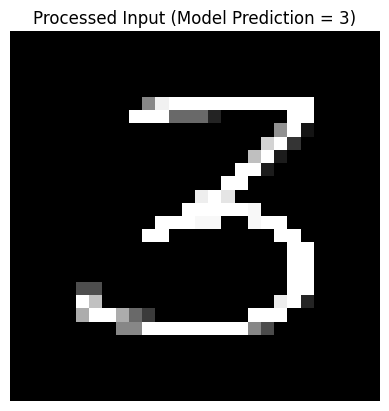

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 1. Load your trained model
model = keras.models.load_model("mnist_cnn.h5")  # change to .h5 if you saved in h5 format

# 2. Load input image (replace with your filename e.g. "5.jpg")
img = cv2.imread("3.jpg")

# 3. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4. Denoise slightly (optional, helps with shadows/noise)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 5. Threshold → Invert (to make digit white on black, like MNIST)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# 6. Find and crop the largest contour (the digit)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit = thresh[y:y+h, x:x+w]
else:
    digit = thresh

# 7. Resize while keeping aspect ratio
digit = cv2.resize(digit, (18,18))  # shrink digit
padded = np.pad(digit, ((5,5),(5,5)), "constant", constant_values=0)

# 8. Normalize & reshape for model
final = padded.astype("float32") / 255.0
final = final.reshape(1,28,28,1)

# 9. Predict
prediction = model.predict(final)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

# 10. Show the processed image
plt.imshow(padded, cmap="gray")
plt.title(f"Processed Input (Model Prediction = {predicted_digit})")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted digit: 5


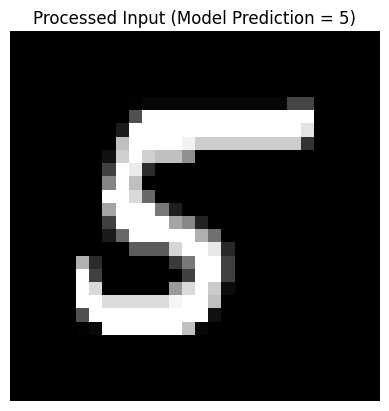

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 1. Load your trained model
model = keras.models.load_model("mnist_cnn.h5")  # change to .h5 if you saved in h5 format

# 2. Load input image (replace with your filename e.g. "5.jpg")
img = cv2.imread("5.jpg")

# 3. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4. Denoise slightly (optional, helps with shadows/noise)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 5. Threshold → Invert (to make digit white on black, like MNIST)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# 6. Find and crop the largest contour (the digit)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit = thresh[y:y+h, x:x+w]
else:
    digit = thresh

# 7. Resize while keeping aspect ratio
digit = cv2.resize(digit, (18,18))  # shrink digit
padded = np.pad(digit, ((5,5),(5,5)), "constant", constant_values=0)

# 8. Normalize & reshape for model
final = padded.astype("float32") / 255.0
final = final.reshape(1,28,28,1)

# 9. Predict
prediction = model.predict(final)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

# 10. Show the processed image
plt.imshow(padded, cmap="gray")
plt.title(f"Processed Input (Model Prediction = {predicted_digit})")
plt.axis("off")
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


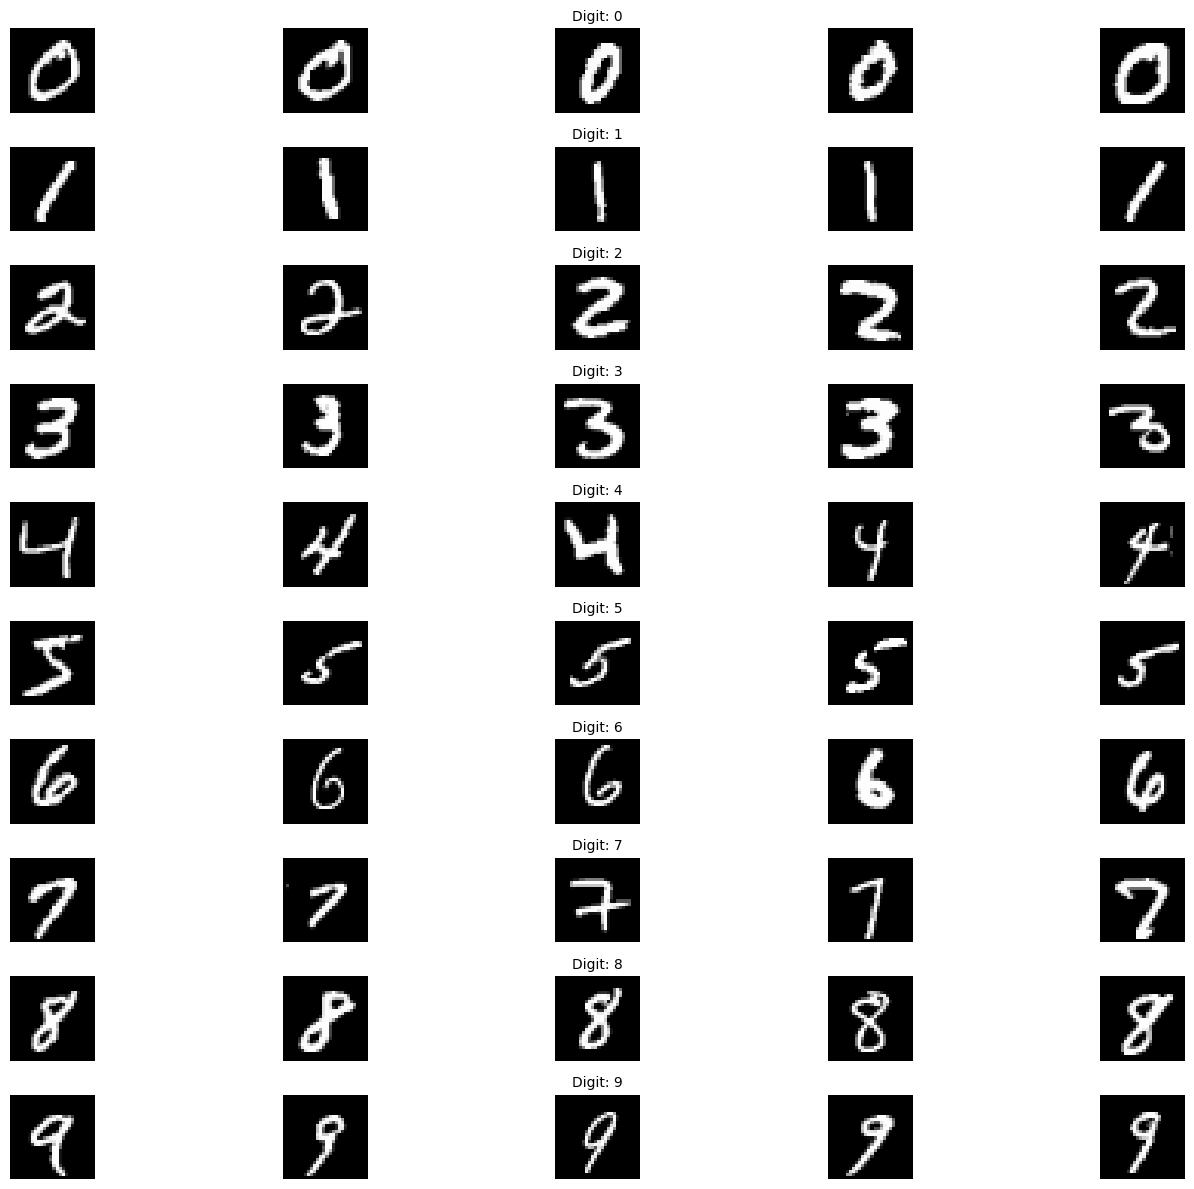

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# For each digit 0-9, show 5 examples
plt.figure(figsize=(15, 12))

for digit in range(10):
    # Find indices where the label equals the current digit
    indices = np.where(y_train == digit)[0][:5]  # take first 5
    for i, idx in enumerate(indices):
        plt.subplot(10, 5, digit*5 + i + 1)  # 10 rows, 5 columns
        plt.imshow(x_train[idx], cmap='gray')
        plt.axis('off')
        if i == 2:  # put label in the middle image of row
            plt.title(f"Digit: {digit}", fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/MyDrive/operator_dataset.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/math_symbols_dataset")


In [ ]:
import os
import shutil

src = "/content/math_symbols_dataset"
dst = "/content/operators_subset"
os.makedirs(dst, exist_ok=True)

operators = ["+", "-", "*", "/", "="]

for op in operators:
    os.makedirs(os.path.join(dst, op), exist_ok=True)
    # Take only first 150 images to reduce size
    files = os.listdir(os.path.join(src, op))[:150]
    for f in files:
        shutil.copy(os.path.join(src, op, f), os.path.join(dst, op, f))

# Check that folders are created
os.listdir(dst)


FileNotFoundError: [Errno 2] No such file or directory: '/content/math_symbols_dataset/+'

In [ ]:
os.listdir("/content/math_symbols_dataset/extracted_images")[:20]


['-', ',', '0', ')', '(', '!', '+']

In [ ]:
import os
import shutil

src = "/content/math_symbols_dataset/extracted_images"
dst = "/content/operators_subset"
os.makedirs(dst, exist_ok=True)

# Only use operators that exist in the dataset
operators = ["+", "-", "*", "/", "="]
existing_ops = [op for op in operators if op in os.listdir(src)]

for op in existing_ops:
    src_folder = os.path.join(src, op)
    dst_folder = os.path.join(dst, op)
    os.makedirs(dst_folder, exist_ok=True)

    files = os.listdir(src_folder)[:150]  # Take only first 150 images
    for f in files:
        shutil.copy(os.path.join(src_folder, f), os.path.join(dst_folder, f))

# Verify folders
os.listdir(dst)


['-', '+']

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import os
import random

# Operators to generate
operators = ["*", "/", "="]
num_images = 150  # images per operator

# Base folder (existing operator_subset folder)
base_dir = "operator_subset"
os.makedirs(base_dir, exist_ok=True)

# Load a handwritten font (download a .ttf handwritten font if you don't have one)
font_path = "PatrickHand-Regular.ttf"  # replace with your font path
font_size = 64
font = ImageFont.truetype(font_path, font_size)

for op in operators:
    op_dir = os.path.join(base_dir, op)
    os.makedirs(op_dir, exist_ok=True)  # create folder if it doesn't exist

    for i in range(num_images):
        # Create white background image
        img = Image.new("L", (64, 64), color=255)
        draw = ImageDraw.Draw(img)

        # Draw the operator with random position jitter
        x_jitter = random.randint(-5, 5)
        y_jitter = random.randint(-5, 5)
        draw.text((10 + x_jitter, 0 + y_jitter), op, font=font, fill=0)

        # Apply random rotation for handwriting effect
        angle = random.uniform(-15, 15)
        img = img.rotate(angle, expand=1, fillcolor=255)

        # Crop/pad back to 64x64
        img = img.resize((64, 64))

        # Save image inside operator_subset folder
        img.save(os.path.join(op_dir, f"{op}_{i+1}.png"))

print("Handwritten-like operator images generated and added to operator_subset folder!")



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/math_symbols_dataset/data.rar


Would you like to replace the existing file /content/math_symbols_dataset/extracted_images/extracted_images/!/!_100071.jpg
   544 bytes, modified on 2017-01-15 16:31
with a new one
   544 bytes, modified on 2017-01-15 16:31

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

In [ ]:
import os, random, zipfile, requests, shutil
from PIL import Image, ImageDraw, ImageFont, ImageOps, ImageFilter
import numpy as np

# Operators & dataset
operators = ["x", "/"]
num_images = 150
base_dir = "operator_subset"
os.makedirs(base_dir, exist_ok=True)

# Google Fonts zips (safe, always contain .ttf)
font_zips = {
    "PatrickHand": "https://github.com/google/fonts/raw/main/ofl/patrickhand/PATRICKHAND.zip",
    "IndieFlower": "https://github.com/google/fonts/raw/main/ofl/indieflower/INDIEFLOWER.zip",
    "ShadowsIntoLight": "https://github.com/google/fonts/raw/main/ofl/shadowsintolight/SHADOWSINTO.zip"
}

# Download and extract fonts if missing
font_files = {}
for name, url in font_zips.items():
    font_path = f"{name}.ttf"
    if not os.path.exists(font_path):
        print(f"Downloading {name} font from {url}...")
        try:
            r = requests.get(url)
            r.raise_for_status() # Raise an exception for bad status codes
            zip_path = f"{name}.zip"
            with open(zip_path, "wb") as f:
                f.write(r.content)
            print(f"Downloaded {zip_path}")

            extracted_ttf_path = None
            with zipfile.ZipFile(zip_path, "r") as z:
                print(f"Extracting from {zip_path}...")
                for file in z.namelist():
                    print(f"  Found file in zip: {file}")
                    if file.lower().endswith(".ttf"):
                        # Extract the ttf file to a temporary location
                        extracted_path = z.extract(file, ".")
                        print(f"  Extracted {file} to {extracted_path}")
                        # Move the extracted file to the expected location and rename
                        shutil.move(extracted_path, font_path)
                        extracted_ttf_path = font_path
                        print(f"  Moved {extracted_path} to {font_path}")
                        break # Assume only one ttf per zip

            os.remove(zip_path)
            if extracted_ttf_path:
                font_files[name] = extracted_ttf_path
                print(f"Successfully processed {name}. Font file at: {font_files[name]}")
            else:
                print(f"Error: No .ttf file found in {zip_path} for {name}.")
                # Optionally, handle this error more explicitly, e.g., by skipping this font
                # or raising an exception. For now, we'll continue and likely fail later.

        except requests.exceptions.RequestException as e:
            print(f"Error downloading {name} font from {url}: {e}")
            # Handle download errors, maybe skip this font

        except zipfile.BadZipFile:
            print(f"Error: Downloaded file {zip_path} for {name} is not a valid zip file.")
            # Handle invalid zip files

        except Exception as e:
            print(f"An unexpected error occurred while processing {name}: {e}")
            # Catch any other potential errors during extraction/moving
    else:
        font_files[name] = font_path
        print(f"Font file for {name} already exists at {font_files[name]}")


# Noise augmentation
def add_noise(img):
    arr = np.array(img)
    noise = np.random.randint(0, 50, arr.shape, dtype="uint8")
    mask = np.random.rand(*arr.shape) < 0.05
    arr[mask] = np.clip(arr[mask] + noise[mask], 0, 255)
    return Image.fromarray(arr)

# Generate dataset
for op in operators:
    op_dir = os.path.join(base_dir, op)
    os.makedirs(op_dir, exist_ok=True)

    for i in range(num_images):
        font_name = random.choice(list(font_files.keys())) # Choose only from successfully downloaded fonts
        try:
            font = ImageFont.truetype(font_files[font_name], 64)
        except OSError as e:
            print(f"Error loading font {font_files[font_name]} for operator {op}: {e}")
            continue # Skip generating image for this font/operator combination

        img = Image.new("L", (64, 64), 255)
        draw = ImageDraw.Draw(img)

        # random jitter
        x_jitter, y_jitter = random.randint(-5, 5), random.randint(-5, 5)
        draw.text((10 + x_jitter, 0 + y_jitter), op, font=font, fill=0)

        # rotation
        angle = random.uniform(-20, 20)
        img = img.rotate(angle, expand=1, fillcolor=255)

        # skew
        if random.random() < 0.5:
            coeffs = (1, random.uniform(-0.3, 0.3), 0,
                      random.uniform(-0.3, 0.3), 1, 0)
            img = img.transform(img.size, Image.AFFINE, coeffs, fillcolor=255)

        # noise
        if random.random() < 0.5:
            img = add_noise(img)

        # blur
        if random.random() < 0.3:
            img = img.filter(ImageFilter.GaussianBlur(radius=1))

        img = ImageOps.fit(img, (64, 64), method=Image.Resampling.LANCZOS)
        img.save(os.path.join(op_dir, f"{op}_{i+1}.png"))

print("✅ Handwritten-like operator dataset generation attempt finished.")

Font file for PatrickHand already exists at PatrickHand.ttf
Font file for IndieFlower already exists at IndieFlower.ttf
Font file for ShadowsIntoLight already exists at ShadowsIntoLight.ttf
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operator x: unknown file format
Error loading font ShadowsIntoLight.ttf for operat

In [ ]:
import shutil
import os

folder_path = "operator_subset"

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print("✅ Deleted folder:", folder_path)
else:
    print("⚠️ Folder not found:", folder_path)


✅ Deleted folder: operator_subset


In [ ]:
import os
import random
import requests
from PIL import Image, ImageDraw, ImageFont, ImageOps, ImageFilter
import numpy as np

# -------------------------------
# 1️⃣ Paths and folders
# -------------------------------
base_path = "/content/operators_subset"
div_symbols = {"slash": "/", "div_sign": "÷"}  # folder_name: symbol
num_images = 150  # number of images per operator

# Create folders if they don't exist
for folder in div_symbols.keys():
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

# -------------------------------
# 2️⃣ Download verified fonts if missing
# -------------------------------
fonts_urls = {
    "PatrickHand": "https://github.com/google/fonts/raw/main/ofl/patrickhand/PatrickHand-Regular.ttf",
    "IndieFlower": "https://github.com/google/fonts/raw/main/ofl/indieflower/IndieFlower-Regular.ttf",
    "ShadowsIntoLight": "https://github.com/google/fonts/raw/main/ofl/shadowsintolight/ShadowsIntoLight-Regular.ttf"
}

fonts = []
for name, url in fonts_urls.items():
    font_path = f"{name}.ttf"
    if not os.path.exists(font_path):
        print(f"Downloading {name} font...")
        r = requests.get(url)
        with open(font_path, "wb") as f:
            f.write(r.content)
    fonts.append(font_path)

# -------------------------------
# 3️⃣ Helper function: add noise
# -------------------------------
def add_noise(img):
    arr = np.array(img)
    noise = np.random.randint(0, 50, arr.shape, dtype="uint8")
    mask = np.random.rand(*arr.shape) < 0.05
    arr[mask] = np.clip(arr[mask] + noise[mask], 0, 255)
    return Image.fromarray(arr)

# -------------------------------
# 4️⃣ Generate images
# -------------------------------
for folder_name, symbol in div_symbols.items():
    folder_path = os.path.join(base_path, folder_name)
    for i in range(num_images):
        font_file = random.choice(fonts)
        try:
            font = ImageFont.truetype(font_file, 64)
        except OSError as e:
            print(f"Error loading font {font_file}: {e}")
            continue

        img = Image.new("L", (64, 64), 255)
        draw = ImageDraw.Draw(img)

        # Random jitter
        x_jitter, y_jitter = random.randint(-5, 5), random.randint(-5, 5)
        draw.text((10 + x_jitter, 0 + y_jitter), symbol, font=font, fill=0)

        # Random rotation
        angle = random.uniform(-20, 20)
        img = img.rotate(angle, expand=1, fillcolor=255)

        # Random skew
        if random.random() < 0.5:
            coeffs = (1, random.uniform(-0.3, 0.3), 0,
                      random.uniform(-0.3, 0.3), 1, 0)
            img = img.transform(img.size, Image.AFFINE, coeffs, fillcolor=255)

        # Noise
        if random.random() < 0.5:
            img = add_noise(img)

        # Optional blur
        if random.random() < 0.3:
            img = img.filter(ImageFilter.GaussianBlur(radius=1))

        # Resize back to 64x64
        img = ImageOps.fit(img, (64, 64), method=Image.Resampling.LANCZOS)

        # Save image
        img.save(os.path.join(folder_path, f"{folder_name}_{i+1}.png"))

print("✅ 150 images each for `/` and `÷` generated successfully!")


Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font ShadowsIntoLight.ttf: unknown file format
Error loading font Shado

Operator folder: plus → 5 images


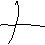

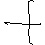

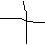

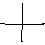

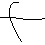

Operator folder: minus → 5 images


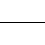

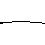

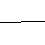

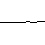

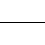

Operator folder: multiply → 5 images


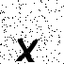

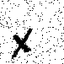

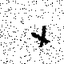

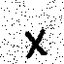

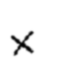

Operator folder: equal → 5 images


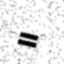

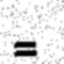

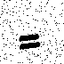

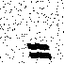

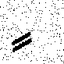

Operator folder: div_sign → 5 images


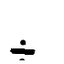

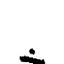

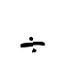

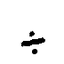

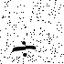

Operator folder: slash → 5 images


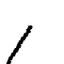

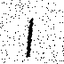

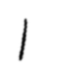

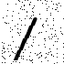

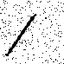

In [ ]:
import os
from PIL import Image
from IPython.display import display

base_path = "/content/operators_subset"

operators = ["plus", "minus", "multiply", "equal","div_sign","slash"]

for op in operators:
    op_path = os.path.join(base_path, op)
    images = [f for f in os.listdir(op_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))][:5]  # first 5 images
    print(f"Operator folder: {op} → {len(images)} images")
    for img_file in images:
        img = Image.open(os.path.join(op_path, img_file))
        display(img)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Path to dataset
base_path = "/content/operators_subset"

# Map folder names to labels
labels_map = {
    "plus": 0,
    "minus": 1,
    "multiply": 2,
    "equal": 3,
    "slash": 4,
    "div_sign": 5
}

image_size = (64, 64)

images = []
labels = []

for folder, label in labels_map.items():
    folder_path = os.path.join(base_path, folder)
    for img_file in os.listdir(folder_path):
        if img_file.endswith(".png"):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path).convert("L")  # grayscale
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0  # normalize
            images.append(img_array)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Add channel dimension for CNN
images = images.reshape(-1, image_size[0], image_size[1], 1)
labels = to_categorical(labels, num_classes=len(labels_map))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(labels_map), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,350 (6.20 MB)

 Trainable params: 1,625,350 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.2005 - loss: 1.6375 - val_accuracy: 0.3333 - val_loss: 1.4024
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.4161 - loss: 1.3230 - val_accuracy: 0.6556 - val_loss: 1.0400
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5822 - loss: 1.0694 - val_accuracy: 0.6778 - val_loss: 0.8683
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.6713 - loss: 0.8495 - val_accuracy: 0.7667 - val_loss: 0.7207
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - accuracy: 0.6869 - loss: 0.6895 - val_accuracy: 0.7444 - val_loss: 0.6619
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.7404 - loss: 0.5607 - val_accuracy: 0.7889 - val_loss: 0.6286
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.8484 - loss: 0.3895 - val_accuracy: 0.7778 - val_loss: 0.5982
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.8640 - loss: 0.3153 - val_accuracy: 0.

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8174 - loss: 0.6534
Test Accuracy: 82.22%


In [ ]:
from tensorflow import keras
from google.colab import files

# 1️⃣ Save in native Keras format (recommended)
model.save("operator_cnn.keras")
print("✅ Model saved as operator_cnn.keras")

# 2️⃣ (Optional) Save in HDF5 format
# model.save("operator_cnn.h5")
# print("✅ Model saved as operator_cnn.h5")

# 3️⃣ Download the saved model to your local machine
files.download("operator_cnn.keras")

# If you saved as .h5 instead:
# files.download("operator_cnn.h5")


✅ Model saved as operator_cnn.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model("operator_cnn.keras")  # or .h5 if you saved that
print("✅ Model loaded successfully")


✅ Model loaded successfully


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8174 - loss: 0.6534
Test Accuracy: 82.22%


In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files

# 1. Load the trained model
model = load_model("mnist_cnn.h5")

# 2. Upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

    # 3. Preprocess the image
    img = Image.open(img_path).convert("L")   # grayscale
    img = ImageOps.invert(img)                # invert (MNIST digits are white on black)
    img = img.resize((28, 28))                # resize to 28x28

    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    # 4. Predict
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    # 5. Show result
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {predicted_digit}")
    plt.axis("off")
    plt.show()

    print("Predicted digit:", predicted_digit)
